# Time series Analysis of ERA5LAND and ASCAT Soil Moisture data

# 1. Import Libraries

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Data 

### ERA5LAND

In [4]:
ds = xr.open_dataset('ERA5LAND_1431.nc')

In [5]:
df_temp = ds['location_id'].to_dataframe()

In [6]:
df_temp['lat'].unique()

array([49.9, 49.8, 49.7, 49.6, 49.5, 49.4, 49.3, 49.2, 49.1, 49. , 48.9,
       48.8, 48.7, 48.6, 48.5, 48.4, 48.3, 48.2, 48.1, 48. , 47.9, 47.8,
       47.7, 47.6, 47.5, 47.4, 47.3, 47.2, 47.1, 47. , 46.9, 46.8, 46.7,
       46.6, 46.5, 46.4, 46.3, 46.2, 46.1, 46. , 45.9, 45.8, 45.7, 45.6,
       45.5, 45.4, 45.3, 45.2, 45.1, 45. ], dtype=float32)

In [7]:
longitude_range = (15.398, 15.627)
latitude_range = (46.823, 47.048)
variables_needed = ['t2m','stl1','tp','swvl1']
latitude_range_new = (46.8,46.9,47.0)
longitude_range_new = (15.3,15.4,15.5,15.6)

In [8]:
locations_in_range = ds.sel(
    locations=((ds['lon'] >= longitude_range[0]) & (ds['lon'] <= longitude_range[1])) &
               ((ds['lat'] >= latitude_range[0]) & (ds['lat'] <= latitude_range[1]))
)

In [9]:
filtered_ds = locations_in_range[variables_needed]

In [10]:
df_era5land = filtered_ds.to_dataframe()

In [11]:
num_rows = len(df_era5land)
print(f'Total number of rows: {num_rows}')


Total number of rows: 140280


In [12]:
df_era5land.head()

t2m        stl1        tp     swvl1  \
locations time                                                              
0         2007-01-01 00:00:00  270.792419  271.956909  0.000000  0.350876   
          2007-01-01 06:00:00  272.500702  271.909424  0.000000  0.350385   
          2007-01-01 12:00:00  277.120514  272.245514  0.000065  0.350771   
          2007-01-01 18:00:00  274.140900  272.437317  0.001455  0.366060   
          2007-01-02 00:00:00  269.440338  272.311279  0.002637  0.377702   

                                lon   lat  alt  
locations time                                  
0         2007-01-01 00:00:00  15.4  47.0  NaN  
          2007-01-01 06:00:00  15.4  47.0  NaN  
          2007-01-01 12:00:00  15.4  47.0  NaN  
          2007-01-01 18:00:00  15.4  47.0  NaN  
          2007-01-02 00:00:00  15.4  47.0  NaN

ERA5 Land have the following variables:
* time
* lon: Longitude
* lat: Latitude
* alt: altitude
* t2m: temperature
* stl1: Soil temperature level 1
* tp: Total precipitation
* swvl1: Volumetric soil water layer 


Saving the data to a csv

In [13]:
df_era5land.to_csv('era5land.csv')

###  ASCAT Data

In [62]:
ascat_data = xr.open_dataset('ASCAT_1431.nc')

In [63]:
ascat_data

<xarray.Dataset> Size: 2GB
Dimensions:                            (obs: 21605447, locations: 1356)
Coordinates:
    lon                                (locations) float32 5kB ...
    lat                                (locations) float32 5kB ...
    alt                                (locations) float32 5kB ...
    time                               (obs) datetime64[ns] 173MB ...
Dimensions without coordinates: obs, locations
Data variables: (12/21)
    locationIndex                      (obs) int64 173MB ...
    location_id                        (locations) int64 11kB ...
    location_description               (locations) <U1 5kB ...
    as_des_pass                        (obs) float32 86MB ...
    swath_indicator                    (obs) float32 86MB ...
    surface_soil_moisture              (obs) float32 86MB ...
    ...                                 ...
    snow_cover_probability             (obs) float32 86MB ...
    frozen_soil_probability            (obs) float32 86MB ...
    wetland_fraction                   (obs) float32 86MB ...
    topographic_complexity             (obs) float32 86MB ...
    subsurface_scattering_probability  (obs) float32 86MB ...
    sat_id                             (obs) float32 86MB ...
Attributes:
    id:                      1431.nc
    global_attributes_flag:  1
    date_created:            2024-02-24 21:41:24
    featureType:             timeSeries

In [64]:
# Extract necessary data: soil moisture, lat, lon, and time
soil_moisture = ascat_data["surface_soil_moisture"].values
lons = ascat_data.lon.values[ascat_data.locationIndex.values]
lats = ascat_data.lat.values[ascat_data.locationIndex.values]
times = ascat_data.time.values

# Flatten the arrays to create a dataframe-friendly format
soil_moisture_flat = soil_moisture.flatten()
lons_flat = lons.flatten()
lats_flat = lats.flatten()
times_flat = times.flatten()

# Create a DataFrame
df = pd.DataFrame({
    'Latitude': lats_flat,
    'Longitude': lons_flat,
    'Time': times_flat,
    'Soil Moisture': soil_moisture_flat
})

# Display the dataframe
print(df.head())

    Latitude  Longitude                          Time  Soil Moisture
0  45.000694  16.822863 2013-01-07 08:23:18.310000128      90.570000
1  45.000694  16.822863 2013-01-13 09:39:06.627000320      64.369995
2  45.000694  16.822863 2013-01-20 20:18:26.490999808      85.159996
3  45.000694  16.822863 2013-01-23 09:32:08.520000000      90.369995
4  45.000694  16.822863 2013-01-23 19:16:18.305000448      87.070000


In [65]:
# Define the latitude and longitude ranges for filtering
longitude_range = (15.398, 15.627)
latitude_range = (46.823, 47.048)

# Filter the DataFrame based on the latitude and longitude ranges
df_filtered_ascat = df[
    (df['Longitude'] >= longitude_range[0]) & (df['Longitude'] <= longitude_range[1]) &
    (df['Latitude'] >= latitude_range[0]) & (df['Latitude'] <= latitude_range[1])
]

# Display the filtered DataFrame
print(df_filtered_ascat.head())

         Latitude  Longitude                          Time  Soil Moisture
320868  46.899136  15.624354 2013-01-07 08:22:48.584999936      46.289997
320869  46.899136  15.624354 2013-01-13 09:38:42.847000064       0.000000
320870  46.899136  15.624354 2013-01-20 20:19:00.462000640      33.189999
320871  46.899136  15.624354 2013-01-23 09:31:43.891000320       0.000000
320872  46.899136  15.624354 2013-01-23 19:16:52.277000192       0.000000


In [19]:
num_rows = len(df)
print(f'Total number of rows: {num_rows}')

Total number of rows: 21605447


ASCAT have the following variables:
* time
* Longitude
* Latitude
* SOil Moisture


Saving the data to a csv

In [20]:
df_filtered_ascat.to_csv('ascat.csv')

# 3. Data exploration

In [21]:
df_era5land.columns

Index(['t2m', 'stl1', 'tp', 'swvl1', 'lon', 'lat', 'alt'], dtype='object')

array([[<Axes: title={'center': 't2m'}>,
        <Axes: title={'center': 'stl1'}>, <Axes: title={'center': 'tp'}>],
       [<Axes: title={'center': 'swvl1'}>,
        <Axes: title={'center': 'lon'}>, <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'alt'}>, <Axes: >, <Axes: >]],
      dtype=object)

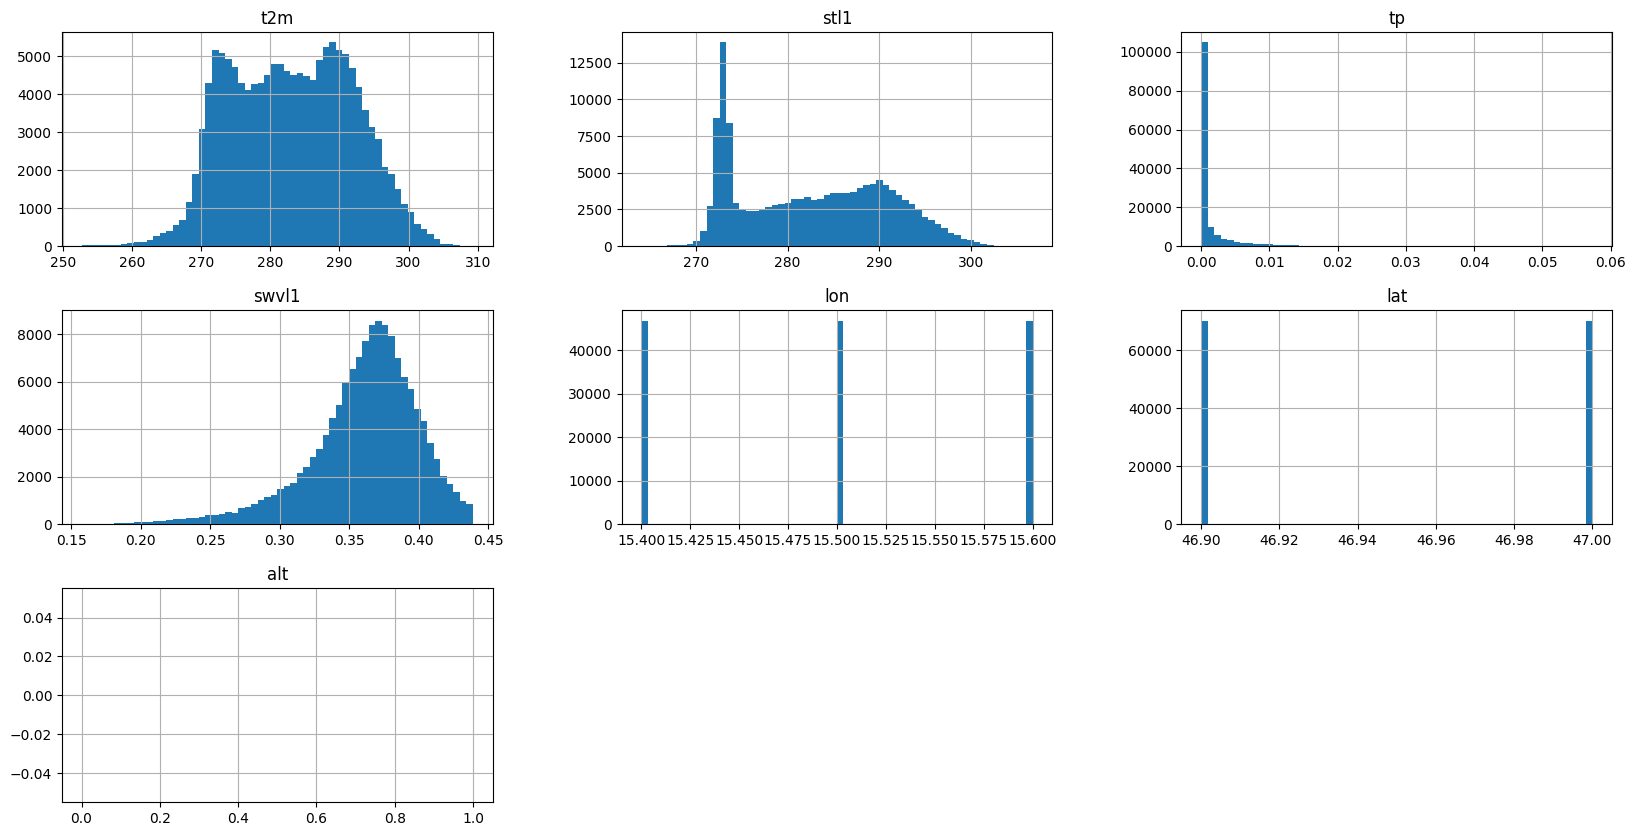

In [22]:
df_era5land.hist(figsize=(20, 10), bins=60)

In [23]:
df_era5land['alt'].value_counts()

Series([], Name: count, dtype: int64)

In [24]:
df_filtered_ascat.columns

Index(['Latitude', 'Longitude', 'Time', 'Soil Moisture'], dtype='object')

array([[<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Soil Moisture'}>]], dtype=object)

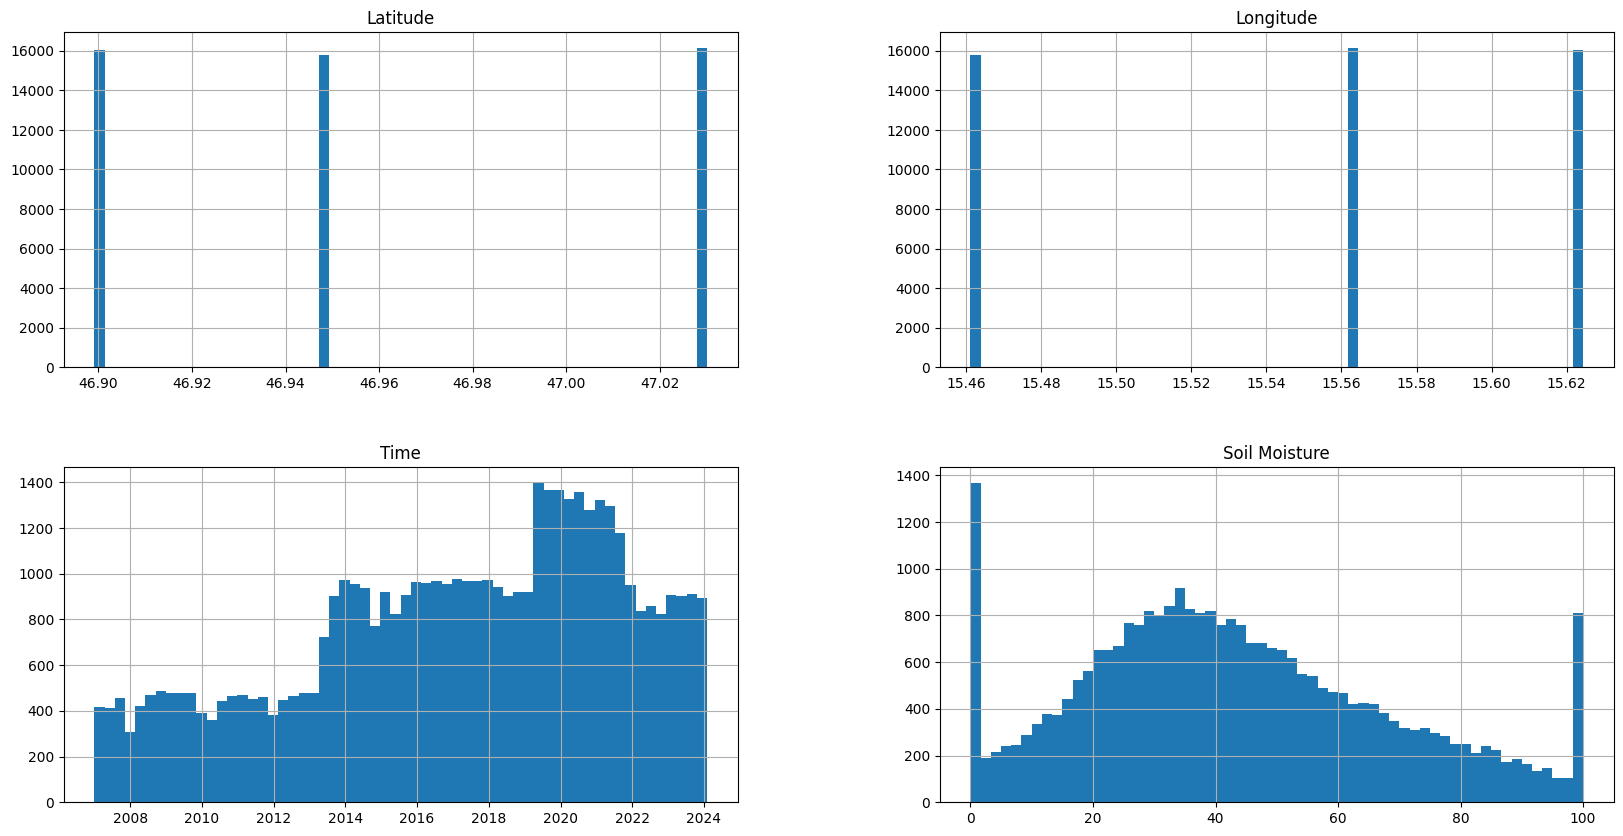

In [25]:
df_filtered_ascat.hist(figsize=(20, 10), bins=60)

# 4. Data Cleaning

In [26]:
df_era5land.isna().sum()

t2m           0
stl1          0
tp            0
swvl1         0
lon           0
lat           0
alt      140280
dtype: int64

In [27]:
df_era5land.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 140280 entries, (0, Timestamp('2007-01-01 00:00:00')) to (5, Timestamp('2023-01-01 18:00:00'))
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   t2m     140280 non-null  float32
 1   stl1    140280 non-null  float32
 2   tp      140280 non-null  float32
 3   swvl1   140280 non-null  float32
 4   lon     140280 non-null  float32
 5   lat     140280 non-null  float32
 6   alt     0 non-null       float32
dtypes: float32(7)
memory usage: 4.8 MB


In [28]:
df_era5land = df_era5land.drop('alt', axis=1)
df_era5land.head()

t2m        stl1        tp     swvl1  \
locations time                                                              
0         2007-01-01 00:00:00  270.792419  271.956909  0.000000  0.350876   
          2007-01-01 06:00:00  272.500702  271.909424  0.000000  0.350385   
          2007-01-01 12:00:00  277.120514  272.245514  0.000065  0.350771   
          2007-01-01 18:00:00  274.140900  272.437317  0.001455  0.366060   
          2007-01-02 00:00:00  269.440338  272.311279  0.002637  0.377702   

                                lon   lat  
locations time                             
0         2007-01-01 00:00:00  15.4  47.0  
          2007-01-01 06:00:00  15.4  47.0  
          2007-01-01 12:00:00  15.4  47.0  
          2007-01-01 18:00:00  15.4  47.0  
          2007-01-02 00:00:00  15.4  47.0

Makin the time column to two columns

In [29]:
# Reset the index to make 'Time' a column again
df_era5land = df_era5land.reset_index()

# Ensure 'Time' column is in datetime format
df_era5land['time'] = pd.to_datetime(df_era5land['time'])

# Create new 'Date' and 'Time_Only' columns
df_era5land['Date'] = df_era5land['time'].dt.date
df_era5land['Time_Only'] = df_era5land['time'].dt.time

# Optionally, drop the original 'Time' column if not needed
df_era5land = df_era5land.drop('time', axis=1)


In [30]:
df_era5land.head()

,locations,t2m,stl1,tp,swvl1,lon,lat,Date,Time_Only
0,0,270.792419,271.956909,0.000000,0.350876,15.4,47.0,2007-01-01,00:00:00
1,0,272.500702,271.909424,0.000000,0.350385,15.4,47.0,2007-01-01,06:00:00
2,0,277.120514,272.245514,0.000065,0.350771,15.4,47.0,2007-01-01,12:00:00
3,0,274.140900,272.437317,0.001455,0.366060,15.4,47.0,2007-01-01,18:00:00
4,0,269.440338,272.311279,0.002637,0.377702,15.4,47.0,2007-01-02,00:00:00


In [31]:
df_era5land.rename(columns={'Time_Only': 'Time'}, inplace=True)

# Display the updated DataFrame
df_era5land.head()

,locations,t2m,stl1,tp,swvl1,lon,lat,Date,Time
0,0,270.792419,271.956909,0.000000,0.350876,15.4,47.0,2007-01-01,00:00:00
1,0,272.500702,271.909424,0.000000,0.350385,15.4,47.0,2007-01-01,06:00:00
2,0,277.120514,272.245514,0.000065,0.350771,15.4,47.0,2007-01-01,12:00:00
3,0,274.140900,272.437317,0.001455,0.366060,15.4,47.0,2007-01-01,18:00:00
4,0,269.440338,272.311279,0.002637,0.377702,15.4,47.0,2007-01-02,00:00:00


In [32]:
df_filtered_ascat.isna().sum()

Latitude             0
Longitude            0
Time                 0
Soil Moisture    18894
dtype: int64

In [33]:
df_filtered_ascat.set_index('Time', inplace=True)
print(df_filtered_ascat.head())

                                Latitude  Longitude  Soil Moisture
Time                                                              
2013-01-07 08:22:48.584999936  46.899136  15.624354      46.289997
2013-01-13 09:38:42.847000064  46.899136  15.624354       0.000000
2013-01-20 20:19:00.462000640  46.899136  15.624354      33.189999
2013-01-23 09:31:43.891000320  46.899136  15.624354       0.000000
2013-01-23 19:16:52.277000192  46.899136  15.624354       0.000000


In [34]:
df_filtered_ascat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48012 entries, 2013-01-07 08:22:48.584999936 to 2024-01-31 08:19:14.648999936
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Latitude       48012 non-null  float32
 1   Longitude      48012 non-null  float32
 2   Soil Moisture  29118 non-null  float32
dtypes: float32(3)
memory usage: 937.7 KB


# 6. Exploratory Data Analysis

In [35]:
df_era5land.head()

,locations,t2m,stl1,tp,swvl1,lon,lat,Date,Time
0,0,270.792419,271.956909,0.000000,0.350876,15.4,47.0,2007-01-01,00:00:00
1,0,272.500702,271.909424,0.000000,0.350385,15.4,47.0,2007-01-01,06:00:00
2,0,277.120514,272.245514,0.000065,0.350771,15.4,47.0,2007-01-01,12:00:00
3,0,274.140900,272.437317,0.001455,0.366060,15.4,47.0,2007-01-01,18:00:00
4,0,269.440338,272.311279,0.002637,0.377702,15.4,47.0,2007-01-02,00:00:00


In [36]:
df_era5land.reset_index(inplace=True)  # Uncomment if needed

In [37]:
df_era5land.head()

,index,locations,t2m,stl1,tp,swvl1,lon,lat,Date,Time
0,0,0,270.792419,271.956909,0.000000,0.350876,15.4,47.0,2007-01-01,00:00:00
1,1,0,272.500702,271.909424,0.000000,0.350385,15.4,47.0,2007-01-01,06:00:00
2,2,0,277.120514,272.245514,0.000065,0.350771,15.4,47.0,2007-01-01,12:00:00
3,3,0,274.140900,272.437317,0.001455,0.366060,15.4,47.0,2007-01-01,18:00:00
4,4,0,269.440338,272.311279,0.002637,0.377702,15.4,47.0,2007-01-02,00:00:00


#### Temperature Plot

KeyboardInterrupt: 

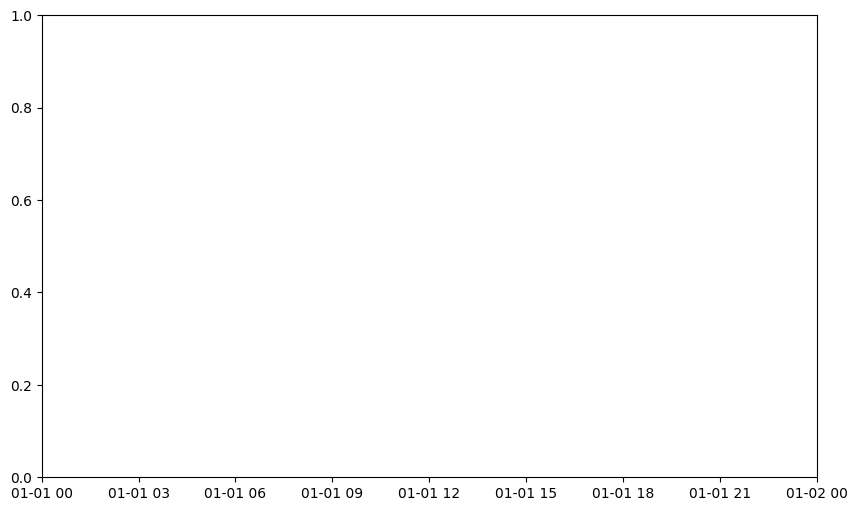

In [38]:
# Create a line plot for the 't2m' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=df_era5land['Date'], y=df_era5land['t2m'])

# Add labels and title
plt.title('Line Plot of t2m over Time')
plt.xlabel('Date')
plt.ylabel('t2m')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#### Soil temperature Plot


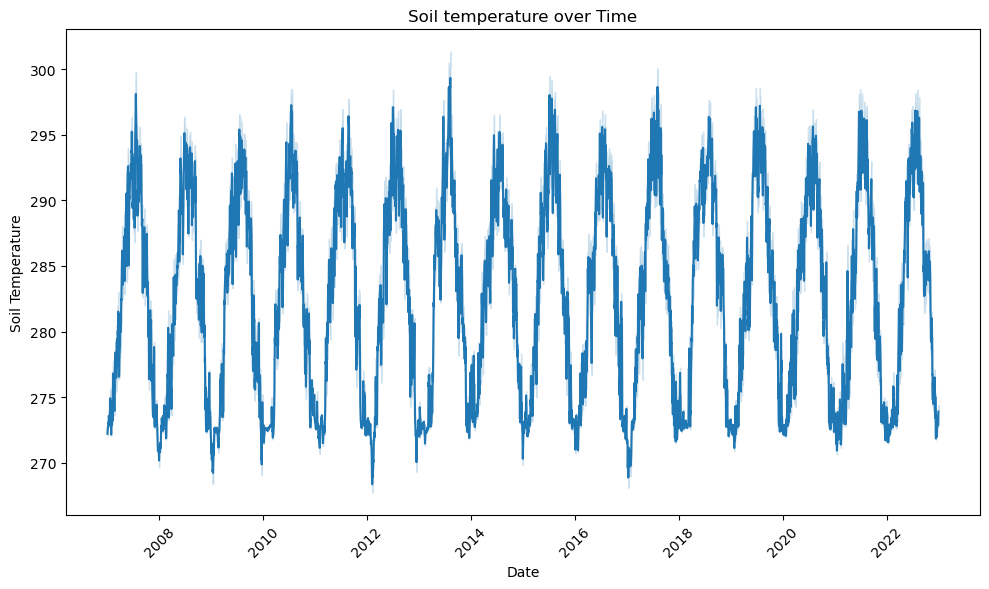

In [50]:
# Create a line plot for the 't2m' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=df_era5land['Date'], y=df_era5land['stl1'])

# Add labels and title
plt.title('Soil temperature over Time')
plt.xlabel('Date')
plt.ylabel('Soil Temperature')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#### Total precipitation Plot

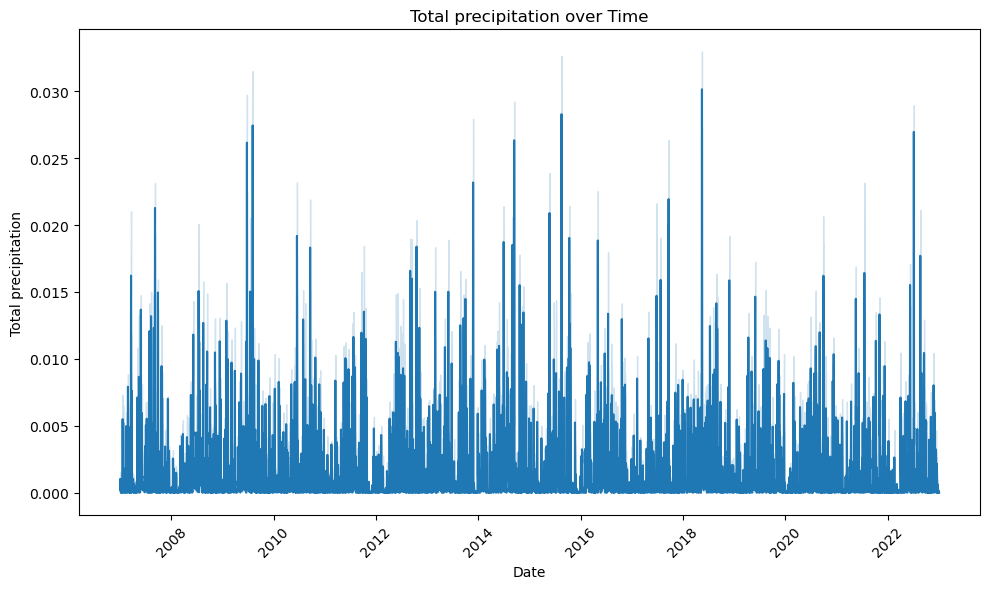

In [51]:
# Create a line plot for the 't2m' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=df_era5land['Date'], y=df_era5land['tp'])

# Add labels and title
plt.title('Total precipitation over Time')
plt.xlabel('Date')
plt.ylabel('Total precipitation')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#### Volumetric soil water layer Plot

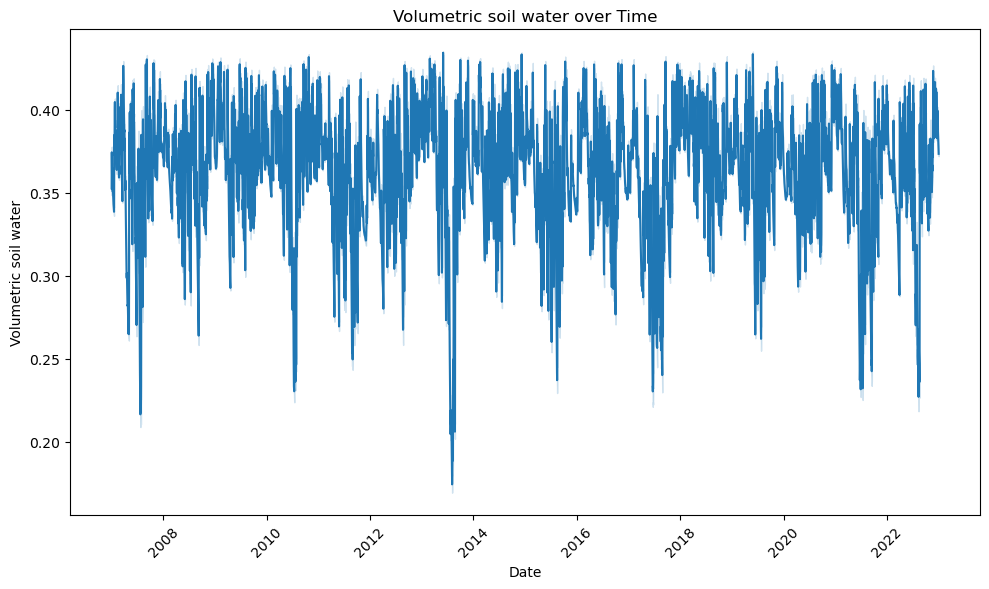

In [52]:
# Create a line plot for the 't2m' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=df_era5land['Date'], y=df_era5land['swvl1'])

# Add labels and title
plt.title('Volumetric soil water over Time')
plt.xlabel('Date')
plt.ylabel('Volumetric soil water')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## 6.1. Soil moisture saturation over time

In [110]:
ascat_df = pd.read_csv('ascat.csv')
ascat_df.set_index('Time', inplace=True)
ascat_df.drop(ascat_df.columns[0],axis=1,inplace=True)
ascat_df.index = pd.to_datetime(ascat_df.index)
# Create 'date' and 'time' columns from the index
ascat_df['date'] = ascat_df.index.date
ascat_df['time'] = ascat_df.index.time

# Reset the index
ascat_df = ascat_df.reset_index(drop=True)

In [112]:
ascat_df.isnull().sum()

Latitude             0
Longitude            0
Soil Moisture    18894
date                 0
time                 0
dtype: int64

In [113]:
ascat_df.dropna(inplace=True)

In [157]:
ascat_df.isnull().sum()

Latitude         0
Longitude        0
Soil Moisture    0
date             0
time             0
year             0
month            0
dtype: int64

In [125]:
# Ensure the 'date' column is in datetime format
ascat_df['date'] = pd.to_datetime(ascat_df['date'])

ascat_df['year'] = ascat_df['date'].dt.year

In [126]:
ascat_df['year'].max()

np.int32(2024)

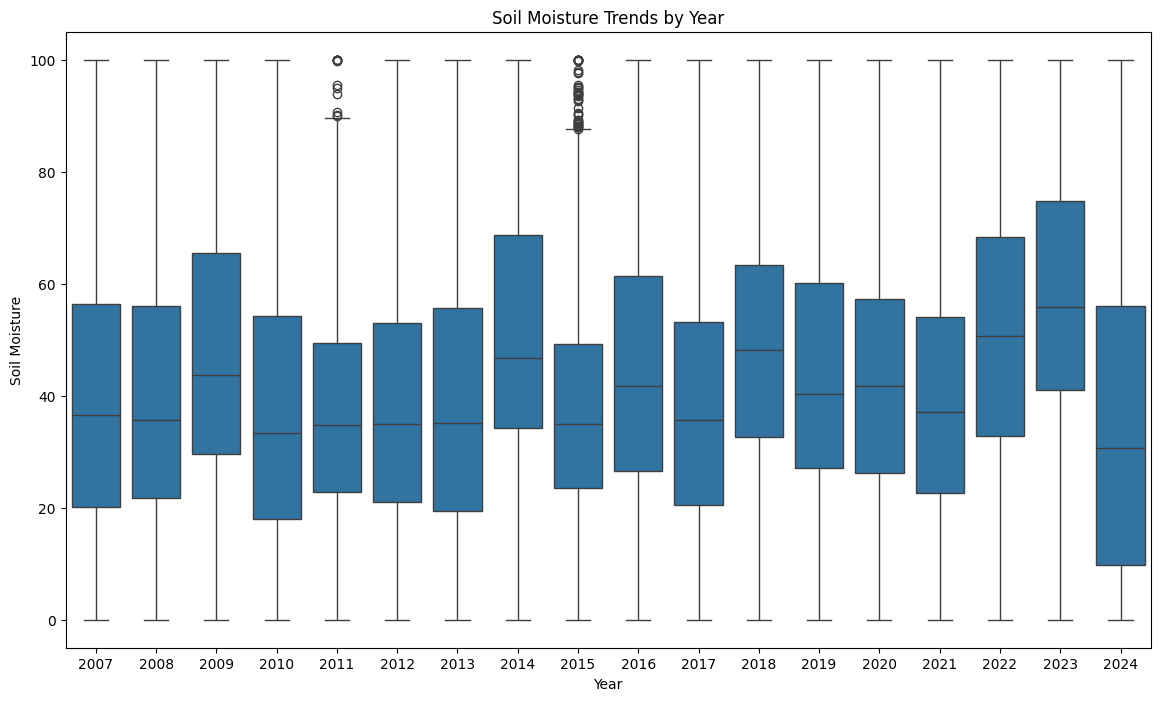

In [147]:
ascat_df['year'] = ascat_df['date'].dt.year

# Create the boxplot for soil moisture by year
plt.figure(figsize=(14, 8))
sns.boxplot(x='year', y='Soil Moisture', data=ascat_df, showfliers=True)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Soil Moisture')
plt.title('Soil Moisture Trends by Year')

# Display the plot
plt.show()

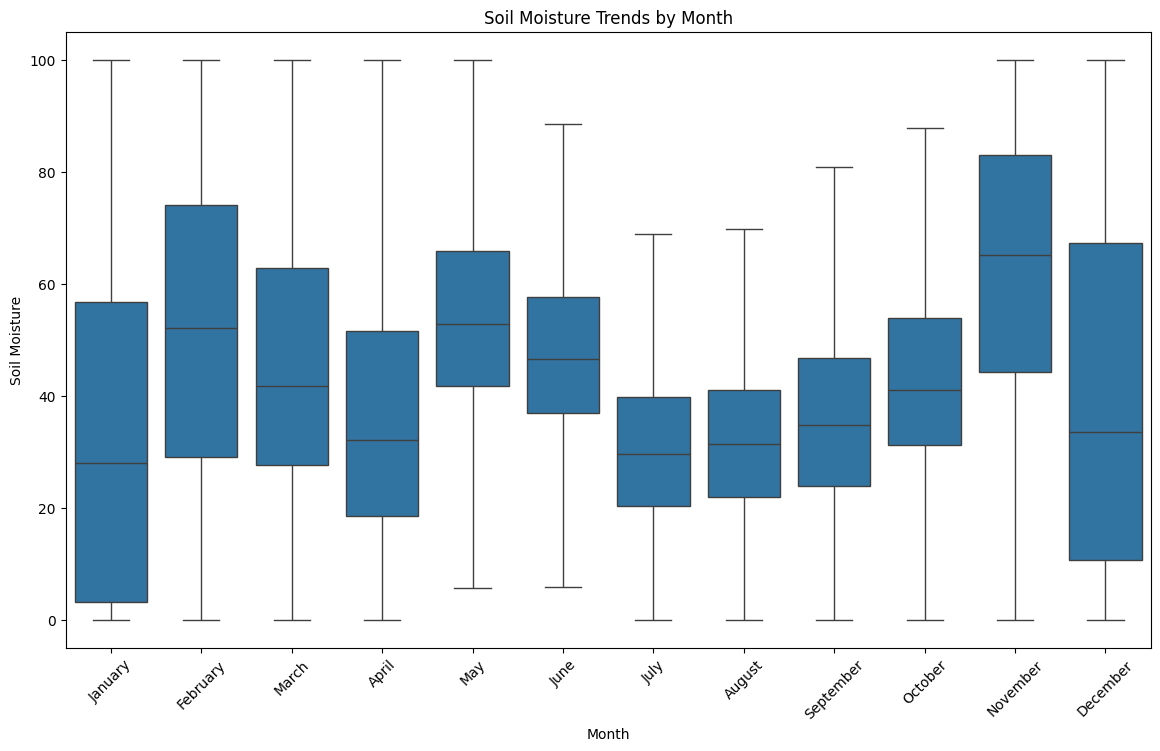

In [148]:
# Extract month from the date column
ascat_df['month'] = ascat_df['date'].dt.month_name()  # Get month names for better readability

# Create the boxplot for soil moisture by month
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='Soil Moisture', data=ascat_df, showfliers=False, order=[
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'
])

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Soil Moisture')
plt.title('Soil Moisture Trends by Month')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

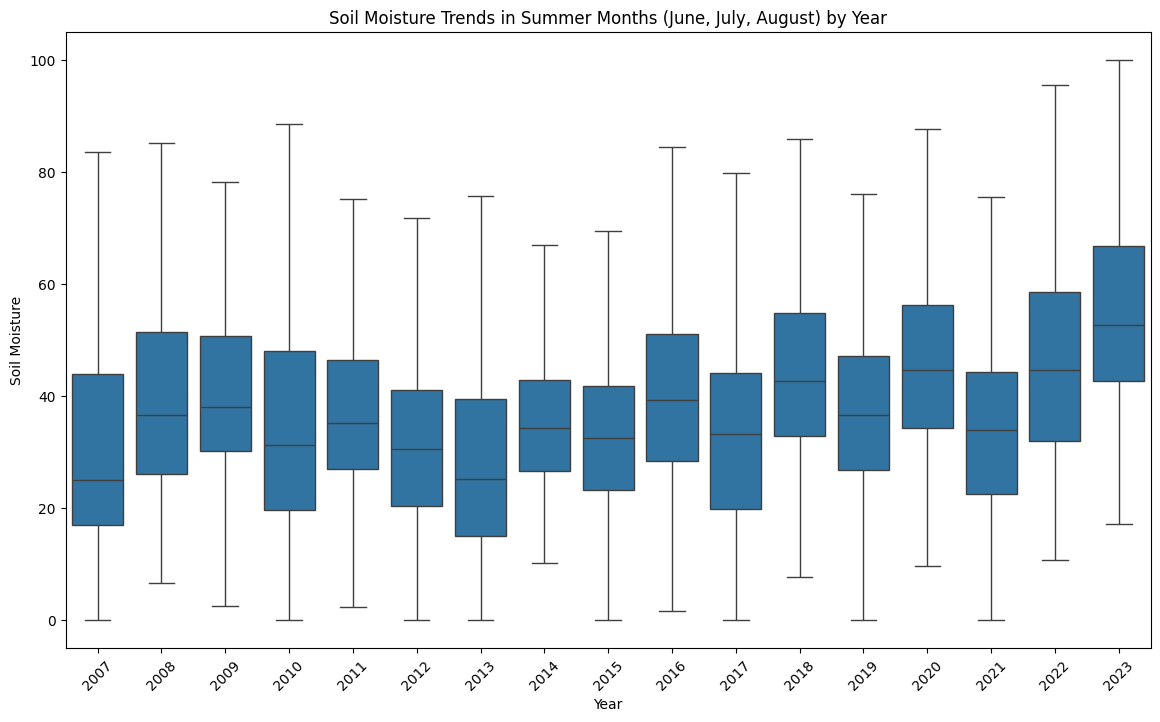

In [151]:

ascat_df['month'] = ascat_df['date'].dt.month
# Filter for summer months (June=6, July=7, August=8)
summer_data = ascat_df[ascat_df['month'].isin([6, 7, 8])]

# Create the boxplot for soil moisture for summer months with years on the x-axis
plt.figure(figsize=(14, 8))
sns.boxplot(x='year', y='Soil Moisture', data=summer_data, showfliers=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Soil Moisture')
plt.title('Soil Moisture Trends in Summer Months (June, July, August) by Year')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

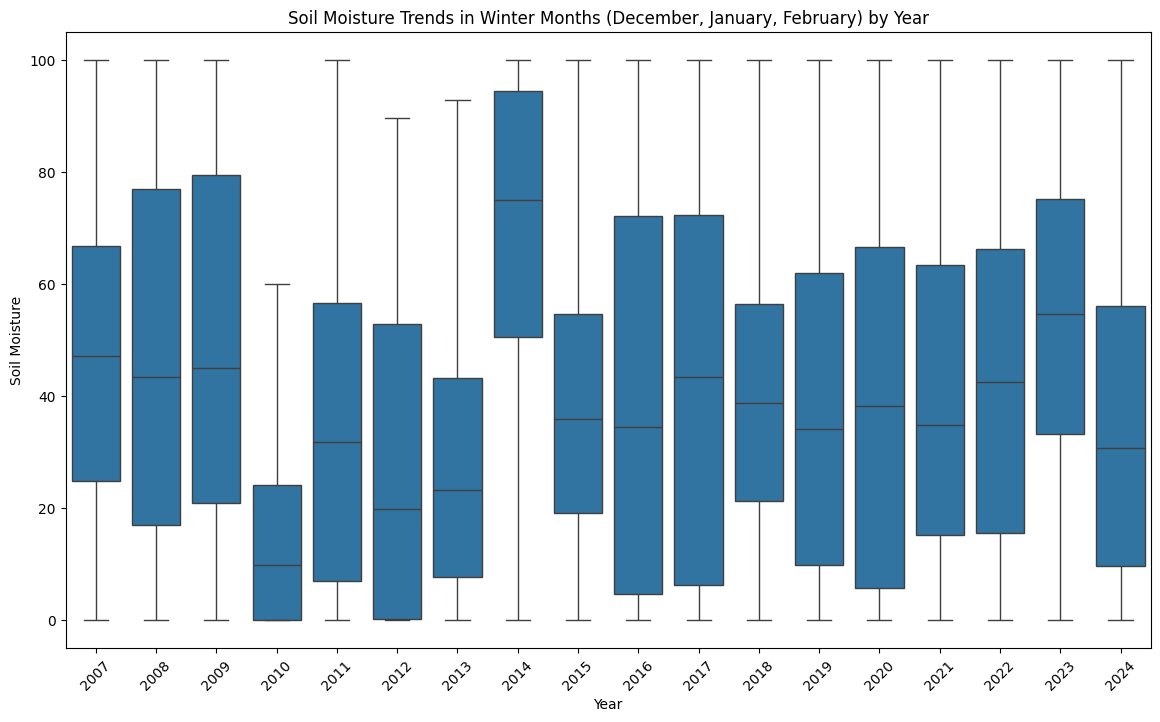

In [152]:
# Filter for winter months (December=12, January=1, February=2)
winter_data = ascat_df[ascat_df['month'].isin([12, 1, 2])]

# Create the boxplot for soil moisture for winter months with years on the x-axis
plt.figure(figsize=(14, 8))
sns.boxplot(x='year', y='Soil Moisture', data=winter_data, showfliers=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Soil Moisture')
plt.title('Soil Moisture Trends in Winter Months (December, January, February) by Year')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## 6.2. Correlation between ASCAT satellite data and ERA5 data

In [226]:
df_era5land_new = df_era5land.copy()[['Date','swvl1']]
# Rename the column from 'Date' to 'date'
df_era5land_new.rename(columns={'Date': 'date'}, inplace=True)
ascat_df_new = ascat_df.copy()[['date','Soil Moisture']]

In [227]:
df1_aggregated = df_era5land_new.groupby('date').mean().reset_index()
df2_aggregated = ascat_df_new.groupby('date').mean().reset_index()

In [228]:
df1_aggregated['date'] = pd.to_datetime(df1_aggregated['date'])
df2_aggregated['date'] = pd.to_datetime(df2_aggregated['date'])

In [229]:
merged_df = pd.merge(df1_aggregated,df2_aggregated , on='date', how='inner')  # Inner join to keep only matching timestamps

## Interpretation of the Correlation Coefficient

    1: Perfect positive correlation
    0: No correlation
    -1: Perfect negative correlation
    
    Values close to 1 indicate a strong positive correlation, while values close to -1 indicate a strong negative correlation.

In [232]:
correlation = merged_df['swvl1'].corr(merged_df['Soil Moisture'])

print(f"Correlation coefficient between Volumetric Soil Water and Soil Moisture is : {correlation}")

Correlation coefficient between Volumetric Soil Water and Soil Moisture is : 0.4456496509754738


### Scatter Plot

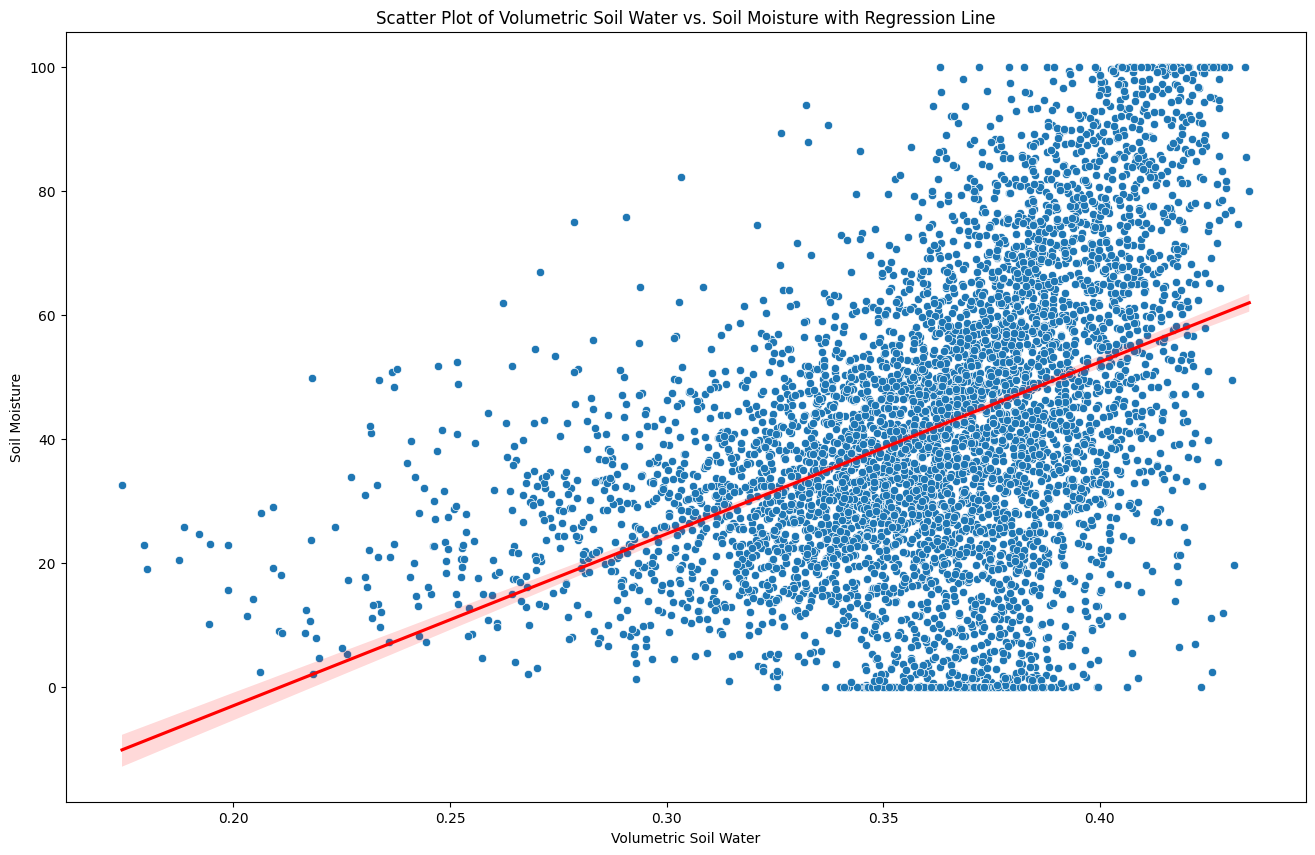

In [234]:
# Create a scatter plot
plt.figure(figsize=(16, 10))
sns.scatterplot(data=merged_df, x='swvl1', y='Soil Moisture')

# Fit a regression line
sns.regplot(data=merged_df, x='swvl1', y='Soil Moisture', scatter=False, color='red')

# Set plot labels and title
plt.xlabel('Volumetric Soil Water')
plt.ylabel('Soil Moisture')
plt.title('Scatter Plot of Volumetric Soil Water vs. Soil Moisture with Regression Line')

# Show the plot
plt.show()

### Heatmap

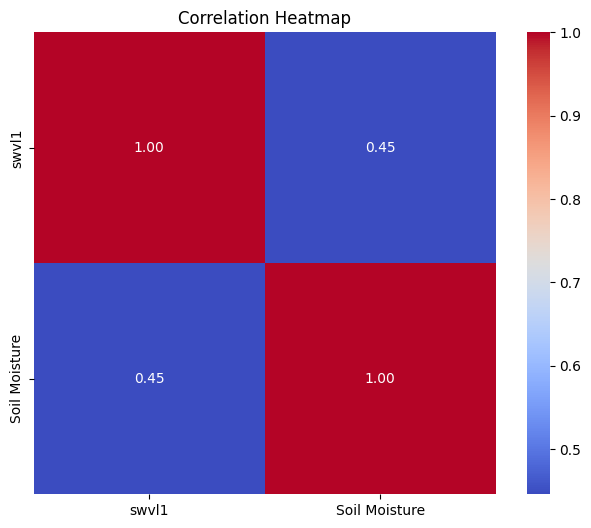

In [236]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['swvl1','Soil Moisture']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

### Pair Plot

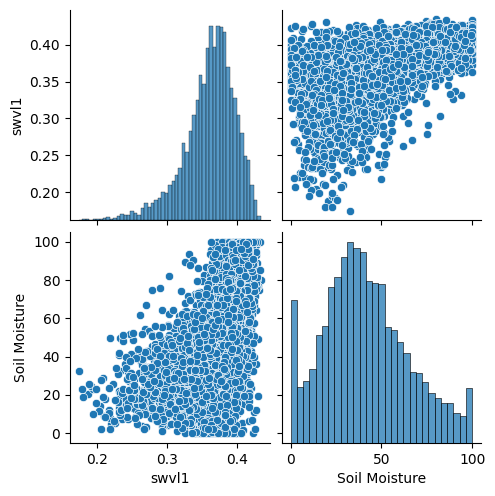

In [239]:
# Create a pair plot
sns.pairplot(merged_df[['swvl1','Soil Moisture']])

# Show the plot
plt.show()

# 7. Temporal patterns 
Temporal patterns of extreme soil moisture events including their duration, frequency, and seasonality


In [241]:
ascat_df_temporal = ascat_df.copy()

In [251]:
ascat_df_temporal

,Latitude,Longitude,Soil Moisture,date,time,year,month,extreme_event,group
0,46.899136,15.624354,46.289997,2013-01-07,08:22:48.584999,2013,1,False,1
1,46.899136,15.624354,0.000000,2013-01-13,09:38:42.847000,2013,1,False,1
2,46.899136,15.624354,33.190000,2013-01-20,20:19:00.462000,2013,1,False,1
3,46.899136,15.624354,0.000000,2013-01-23,09:31:43.891000,2013,1,False,1
4,46.899136,15.624354,0.000000,2013-01-23,19:16:52.277000,2013,1,False,1
...,...,...,...,...,...,...,...,...,...
48000,47.030087,15.562049,26.480000,2024-01-23,19:10:15.255000,2024,1,False,3145
48002,47.030087,15.562049,51.539997,2024-01-25,08:43:34.815000,2024,1,False,3145
48004,47.030087,15.562049,42.270000,2024-01-26,08:22:46.190000,2024,1,False,3145
48006,47.030087,15.562049,22.820000,2024-01-28,09:21:31.926999,2024,1,False,3145


In [242]:
# Define extreme soil moisture threshold (e.g., above 90th percentile)
threshold = ascat_df_temporal['Soil Moisture'].quantile(0.90)

# Identify extreme events
ascat_df_temporal['extreme_event'] = ascat_df_temporal['Soil Moisture'] > threshold

In [249]:
print(f"Threshold is : {threshold}")

Threshold is : 78.893


In [250]:
# Group by date to identify contiguous extreme events
ascat_df_temporal['group'] = (ascat_df_temporal['extreme_event'] != ascat_df_temporal['extreme_event'].shift()).cumsum()
extreme_groups = ascat_df_temporal[ascat_df_temporal['extreme_event']].groupby('group')

# Calculate duration of each extreme event
event_durations = extreme_groups.agg(
    start=('date', 'min'),
    end=('date', 'max'),
    duration=('date', lambda x: (x.max() - x.min()).days + 1),
    frequency=('date', 'count')
).reset_index(drop=True)

# Show extreme events information
print(event_durations)

          start        end  duration  frequency
0    2013-03-09 2013-03-09         1          1
1    2013-04-01 2013-04-03         3          2
2    2013-11-09 2013-11-16         8          3
3    2018-01-01 2018-01-02         2          2
4    2018-01-06 2018-01-06         1          1
...         ...        ...       ...        ...
1567 2021-05-19 2021-05-19         1          1
1568 2021-11-26 2021-11-26         1          2
1569 2021-12-02 2021-12-02         1          1
1570 2024-01-01 2024-01-01         1          1
1571 2024-01-06 2024-01-06         1          1

[1572 rows x 4 columns]


In [252]:
# Add month column
ascat_df_temporal['month'] = ascat_df_temporal['date'].dt.month

# Count extreme events by month
monthly_counts = ascat_df_temporal[ascat_df_temporal['extreme_event']].groupby('month').size()

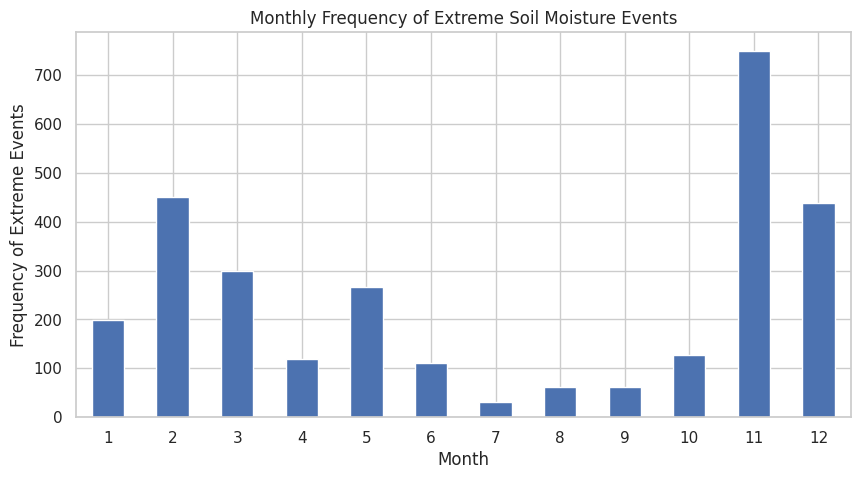

In [278]:
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency of Extreme Events')
plt.title('Monthly Frequency of Extreme Soil Moisture Events')
plt.xticks(rotation=0)
plt.show()

In [259]:
ascat_df_temporal_yearly = ascat_df.copy()
ascat_df_temporal_yearly

,Latitude,Longitude,Soil Moisture,date,time,year,month
0,46.899136,15.624354,46.289997,2013-01-07,08:22:48.584999,2013,1
1,46.899136,15.624354,0.000000,2013-01-13,09:38:42.847000,2013,1
2,46.899136,15.624354,33.190000,2013-01-20,20:19:00.462000,2013,1
3,46.899136,15.624354,0.000000,2013-01-23,09:31:43.891000,2013,1
4,46.899136,15.624354,0.000000,2013-01-23,19:16:52.277000,2013,1
...,...,...,...,...,...,...,...
48000,47.030087,15.562049,26.480000,2024-01-23,19:10:15.255000,2024,1
48002,47.030087,15.562049,51.539997,2024-01-25,08:43:34.815000,2024,1
48004,47.030087,15.562049,42.270000,2024-01-26,08:22:46.190000,2024,1
48006,47.030087,15.562049,22.820000,2024-01-28,09:21:31.926999,2024,1


In [260]:
# Define extreme soil moisture threshold (e.g., above 90th percentile)
threshold = ascat_df_temporal_yearly['Soil Moisture'].quantile(0.90)

# Identify extreme events
ascat_df_temporal_yearly['extreme_event'] = ascat_df_temporal_yearly['Soil Moisture'] > threshold

# Add year column
ascat_df_temporal_yearly['year'] = ascat_df_temporal_yearly['date'].dt.year

# Count extreme events by year
yearly_counts = ascat_df_temporal_yearly[ascat_df_temporal_yearly['extreme_event']].groupby('year').size().reset_index(name='frequency')

# Show yearly frequency of extreme events
print(yearly_counts)

    year  frequency
0   2007        110
1   2008        119
2   2009        200
3   2010        111
4   2011         51
5   2012         72
6   2013        191
7   2014        459
8   2015         94
9   2016        355
10  2017        130
11  2018        183
12  2019        255
13  2020        119
14  2021         92
15  2022        139
16  2023        220
17  2024         12


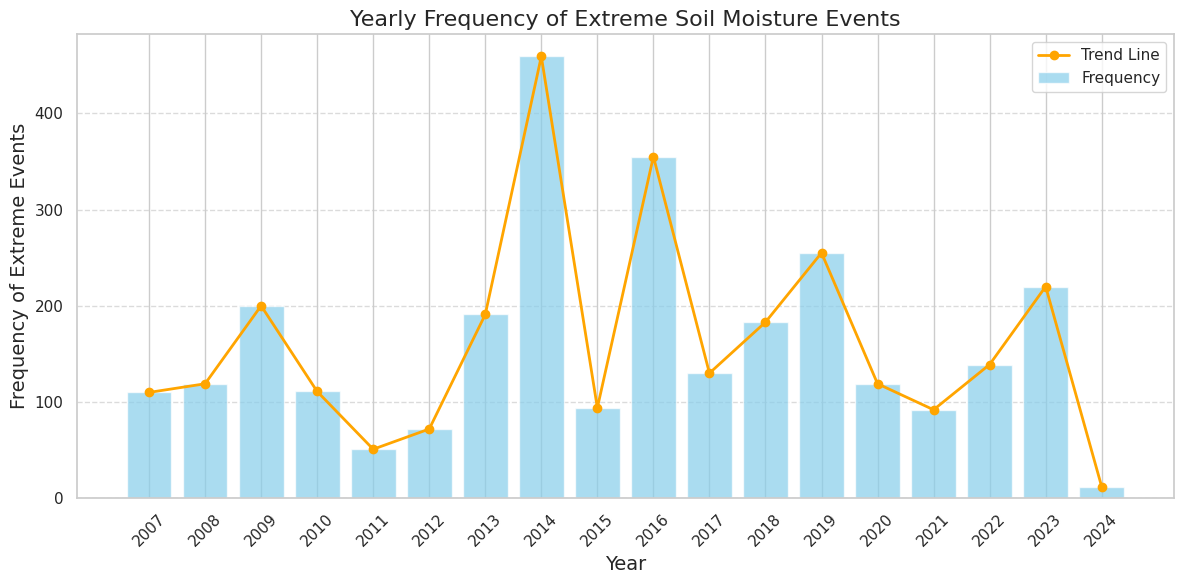

In [264]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Bar plot for yearly frequency of extreme events
plt.bar(yearly_counts['year'], yearly_counts['frequency'], color='skyblue', alpha=0.7, label='Frequency')

# Add a line plot to show change
plt.plot(yearly_counts['year'], yearly_counts['frequency'], color='orange', marker='o', label='Trend Line', linewidth=2)

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency of Extreme Events', fontsize=14)
plt.title('Yearly Frequency of Extreme Soil Moisture Events', fontsize=16)
plt.xticks(yearly_counts['year'], rotation=45)  # Rotate x-ticks for better readability

# Add a legend
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Machine Learning

In [322]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

### Merging data

In [293]:
df_era5land_machine_learning = df_era5land.copy()[['Date','t2m','tp','swvl1']]
# Rename the column from 'Date' to 'date'
df_era5land_machine_learning.rename(columns={'Date': 'date'}, inplace=True)
ascat_df_machine_learning = ascat_df.copy()[['date','Soil Moisture']]
df_era5land_machine_learning['date'] = pd.to_datetime(df_era5land_machine_learning['date'])
ascat_df_machine_learning['date'] = pd.to_datetime(ascat_df_machine_learning['date'])

In [294]:
df1_aggregated_machine_learning = df_era5land_machine_learning.groupby('date').mean().reset_index()
df2_aggregated_machine_learning = ascat_df_machine_learning.groupby('date').mean().reset_index()

In [295]:
merged_df_machine_learning = pd.merge(df1_aggregated_machine_learning,df2_aggregated_machine_learning , on='date', how='inner')  # Inner join to keep only matching timestamps

In [297]:
merged_df_machine_learning.isnull().sum()

date             0
t2m              0
tp               0
swvl1            0
Soil Moisture    0
dtype: int64

In [298]:
X = merged_df_machine_learning[['t2m','tp','swvl1']]
y = merged_df_machine_learning['Soil Moisture']

### Scaling

In [302]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data_min_max = scaler.fit_transform(X)

# Convert back to DataFrame
normalized_df_min_max = pd.DataFrame(normalized_data_min_max, columns=X.columns)
normalized_df_min_max

,t2m,tp,swvl1
0,0.321713,1.484707e-02,0.685699
1,0.300343,3.418123e-02,0.769399
2,0.352885,5.844145e-03,0.730359
3,0.325614,8.204845e-03,0.714936
4,0.320327,1.099635e-02,0.732905
...,...,...,...
5371,0.346698,8.526397e-06,0.829811
5372,0.373492,1.698504e-03,0.817930
5373,0.361613,5.819369e-04,0.800003
5374,0.353241,4.694008e-03,0.781985


### Linear Regression

In [312]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df_min_max, y, test_size=0.2, random_state=42)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 of the original data for validation

# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared:", r2_val)

# Step 5: Test the model on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

Validation Mean Squared Error: 389.56456090810786
Validation R-squared: 0.2818354493859023

Test Mean Squared Error: 390.36818770442227
Test R-squared: 0.2920617648595073


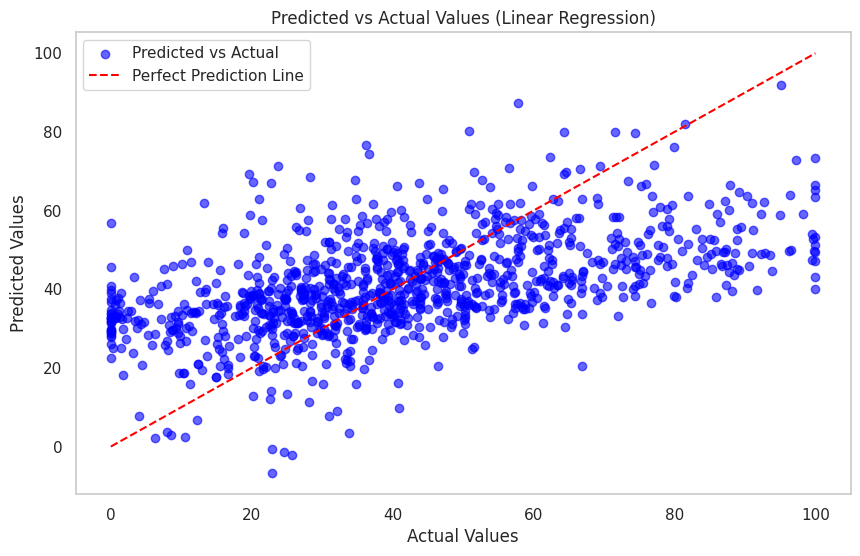

In [313]:
# Step to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

### Decision Tree 

In [314]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df_min_max, y, test_size=0.2, random_state=42)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 of the original data for validation

# Step 3: Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared:", r2_val)

# Step 5: Test the model on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

Validation Mean Squared Error: 538.3236749075337
Validation R-squared: 0.007597151102015753

Test Mean Squared Error: 502.1829206306994
Test R-squared: 0.08928416365171954


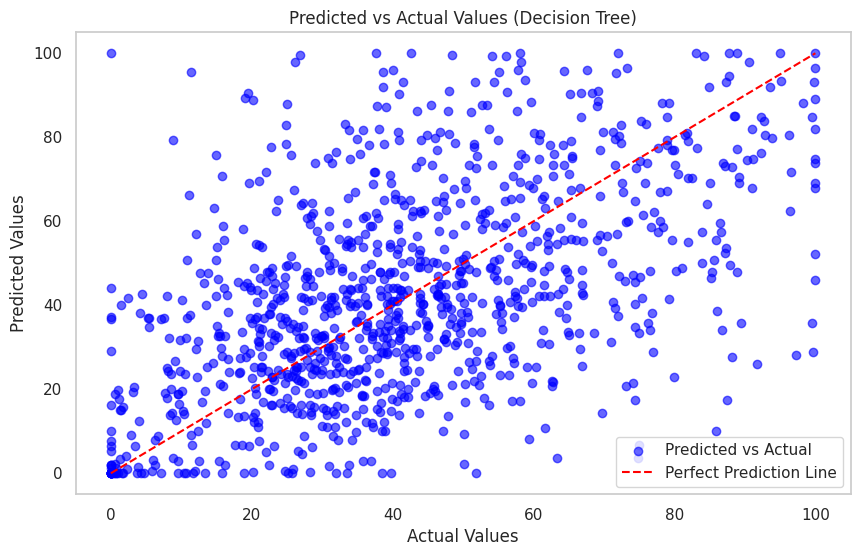

In [315]:
# Step to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

### Random Forest Regressor

In [317]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df_min_max, y, test_size=0.2, random_state=42)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Step 3: Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared:", r2_val)

# Step 5: Test the model on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

Validation Mean Squared Error: 282.86873054668234
Validation R-squared: 0.4785298378212658

Test Mean Squared Error: 306.51017536859786
Test R-squared: 0.4441394574720109


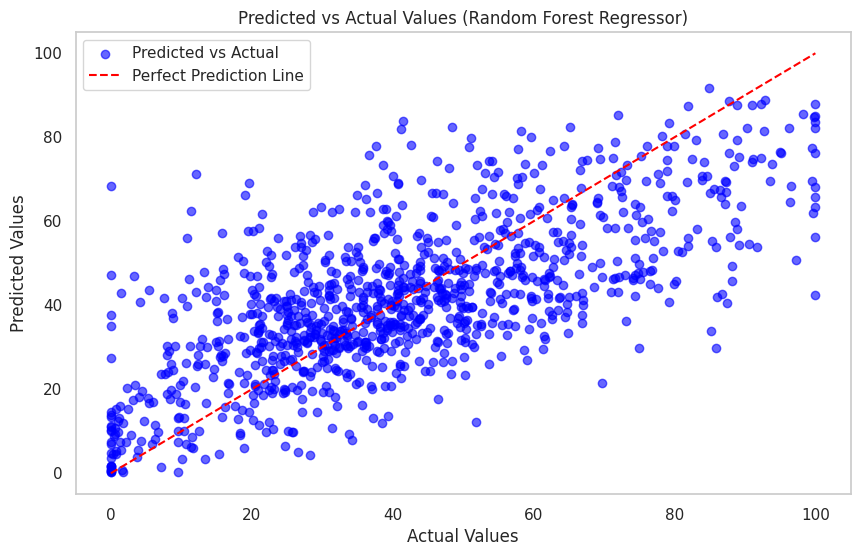

In [318]:
# Step to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

### Gradient Boosting Regressor

In [320]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df_min_max, y, test_size=0.2, random_state=42)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Step 3: Train the Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared:", r2_val)

# Step 5: Test the model on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

Validation Mean Squared Error: 250.87879926156774
Validation R-squared: 0.5375034635843376

Test Mean Squared Error: 284.40597141659475
Test R-squared: 0.4842257442849496


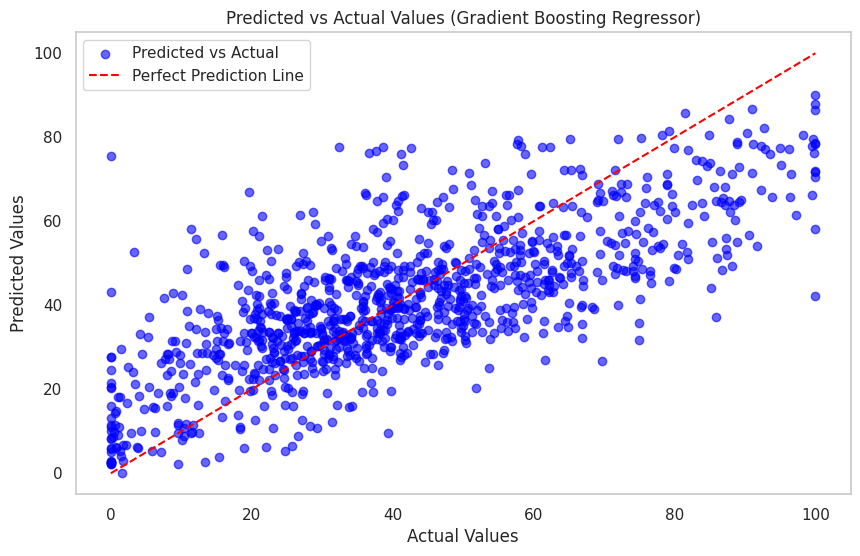

In [321]:
# Step to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

### Support Vector Regression (SVR)

In [323]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df_min_max, y, test_size=0.2, random_state=42)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Step 3: Train the SVR model
model = SVR()
model.fit(X_train, y_train)

# Step 4: Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared:", r2_val)

# Step 5: Test the model on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

Validation Mean Squared Error: 321.1102940164878
Validation R-squared: 0.4080312914954577

Test Mean Squared Error: 334.7317292815708
Test R-squared: 0.39295926989689


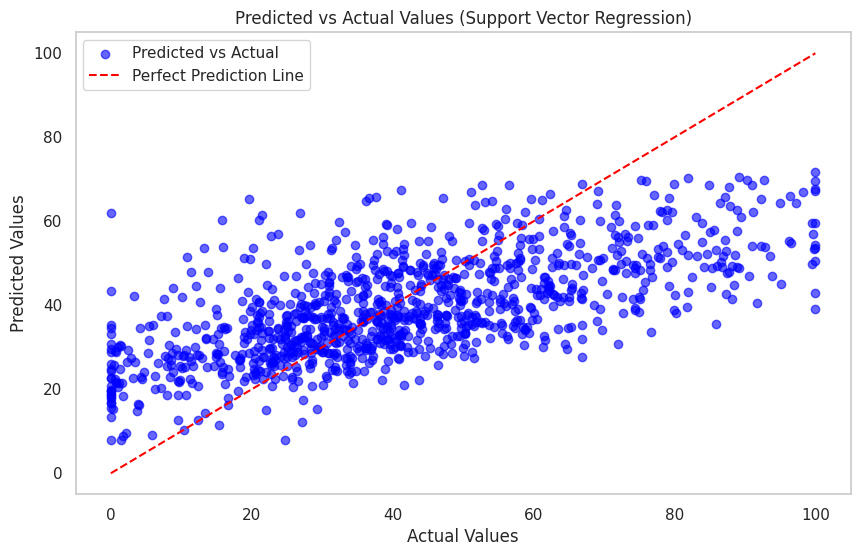

In [324]:
# Step to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Values (Support Vector Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

<h1 style="text-align: center;">Thank You :)</h1>